In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

%matplotlib inline

In [8]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [9]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

first column is the label 
other 784 columns are pixel values

In [23]:
y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values
X_train = df_train.iloc[:, 1:].values/255
X_test = df_test.iloc[:, 1:].values/255

In [24]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [25]:
X_train.shape

(60000, 784)

In [26]:
28 * 28 

784

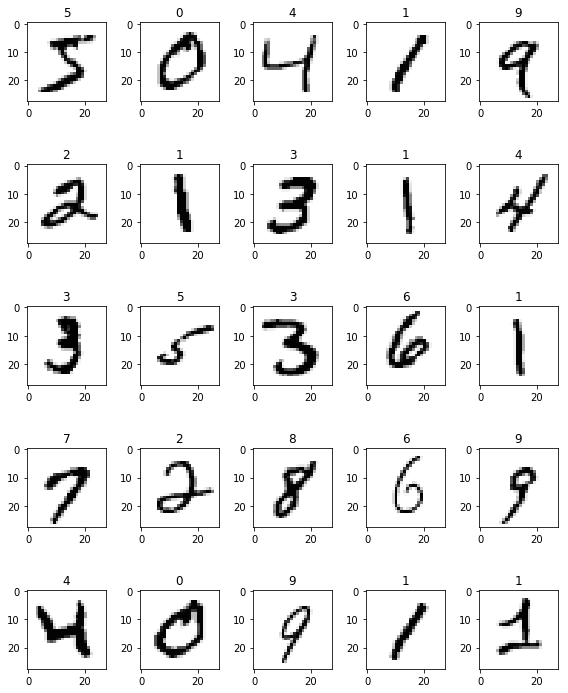

In [27]:
fig, _ = plt.subplots(5, 5, figsize = (8, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap="Greys")
    ax.set_title(y_train[i])
    
plt.tight_layout()

(-0.5, 783.5, 0.0, 0.5746324705882354)

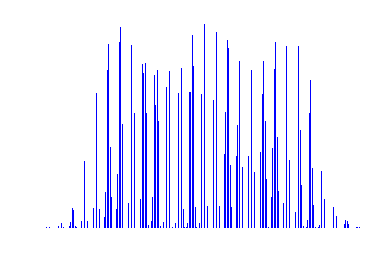

In [30]:
pd.Series(X_train.mean(axis=0)).plot.bar(color = "blue")
plt.axis("off")

In [32]:
(pd.DataFrame({"digit": y_train, 
              "mean": X_train.mean(axis = 1)})
.groupby("digit")["mean"].mean())

digit
0    0.173399
1    0.075999
2    0.148975
3    0.141530
4    0.121366
5    0.128749
6    0.137302
7    0.114528
8    0.150156
9    0.122590
Name: mean, dtype: float64

In [36]:
%%time
est = linear_model.SGDClassifier(learning_rate="invscaling"
                                 , eta0=0.01
                                 , random_state=1
                                 , max_iter=1000
                                 , tol=1e-4)
est.fit(X_train, y_train)
print("test accuracy:", est.score(X_test, y_test))

CPU times: user 48.6 s, sys: 455 ms, total: 49.1 s
Wall time: 49.9 s


In [37]:
print("test accuracy:", est.score(X_test, y_test))

test accuracy: 0.9035


In [38]:
y_test_pred = est.predict(X_test)

In [41]:
res = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})
res["match"]= res.actual == res.predicted
res.sample(100)

,actual,predicted,match
712,4,4,True
2074,4,4,True
6808,0,0,True
3485,9,9,True
4720,0,0,True
6137,8,8,True
8346,3,3,True
1930,2,4,False
464,3,7,False
3196,1,1,True


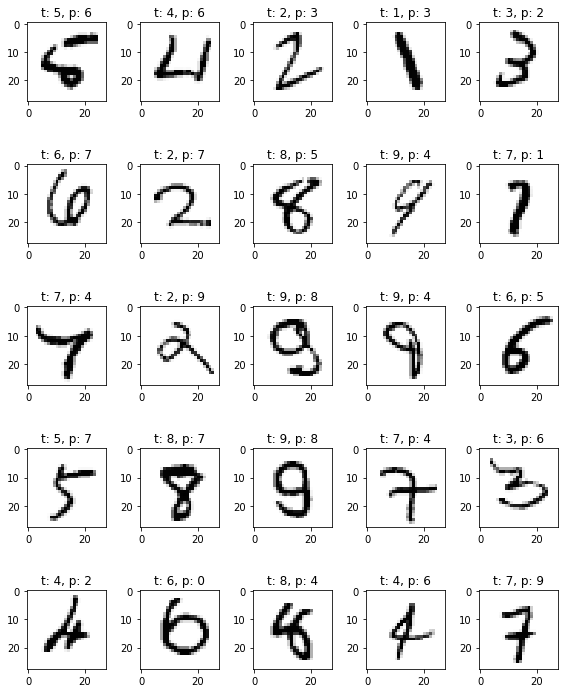

In [44]:
fig, _ = plt.subplots(5, 5, figsize = (8, 10))
matched = res.match
for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[~matched][i].reshape(28, 28), cmap="Greys")
    title = "t: %d, p: %d" % (y_test[~matched][i], y_test_pred[~matched][i])
    ax.set_title(title)
    
plt.tight_layout()

In [45]:
est.coef_.shape

(10, 784)

In [46]:
est.coef_[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -6.20526908e-06, -1.91915790e-04, -3.98804573e-04,
        1.71045395e-05, -6.33340885e-05, -8.89418706e-04, -3.32253852e-04,
       -9.81646552e-04, -7.43448513e-04, -2.33578003e-04, -4.50012959e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

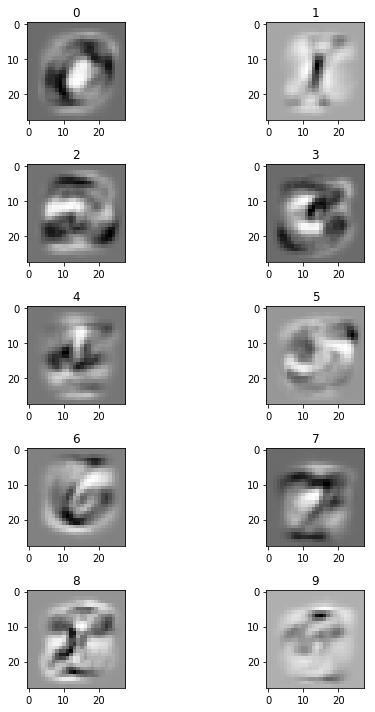

In [47]:
fig, _ = plt.subplots(5, 2, figsize = (8, 10))
matched = res.match
for i, ax in enumerate(fig.axes):
    ax.imshow(est.coef_[i].reshape(28, 28), cmap="Greys")
    ax.set_title(str(i))
    
plt.tight_layout()